# 02 – Exploratory Data Analysis (EDA)

Análisis exploratorio sobre el dataset limpio `dataset_cleaned.csv`.


In [3]:
from pathlib import Path
import sys

cwd = Path().resolve()
PROJECT_ROOT = None

for parent in [cwd, *cwd.parents]:
    if (parent / "src").is_dir():
        PROJECT_ROOT = parent
        break

if PROJECT_ROOT is None:
    raise RuntimeError("No se encontró carpeta 'src' en la jerarquía.")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.config.settings import (
    PROJECT_ROOT as CFG_PROJECT_ROOT,
    TARGET_COL,
)
from src.data.load_data import load_clean_dataset

print("PROJECT_ROOT:", CFG_PROJECT_ROOT)
print("TARGET_COL  :", TARGET_COL)


PROJECT_ROOT: D:\Users\dhcertug\OneDrive - Crystal S.A.S\Documentos\HOME\00_PERSONAL\02_CURSOS\PROYECTO\Proyecto_analisis_intermedio_udea\src
TARGET_COL  : Und_2a_percentage


## Imports y configuración EDA


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.eda import missing_percentage, get_feature_lists

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")
sns.set(style="whitegrid")


## Cargar dataset limpio



In [5]:
df = load_clean_dataset()
df.shape, df.head()


((364832, 27),
    semana_anio  Tur  planta_id  seccion_id  maq_id   Tipo_TEJ Tecnologia  \
 0           10    1          1           7     394       Liso       GOAL   
 1           10    3          1           7     394       Liso       GOAL   
 2           10    1          1           7     394       Liso       GOAL   
 3           47    1          1           7     288  Acanalado       SILV   
 4           19    1          1           7     288  Acanalado       SILV   
 
       Pas    C  producto_id categoria_producto  estilo_id  Tal   Col  \
 0 55.0000  Nac          209              GLXT1          3    7  9905   
 1 55.0000  Nac          209              GLXT1          3    7  7047   
 2 55.0000  Nac          209              GLXT1          3    7  7047   
 3 56.0000  Exp          109              FIIUS         10    1   961   
 4 56.0000  Exp          109              FIMUS         10    2   961   
 
    Tal_Fert  Col_Fert  Componentes  g_art_id  mp_id   MP mp_categoria  \
 0     

In [ ]:
## Calidad de datos y tipos
df.info()
missing_percentage(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364832 entries, 0 to 364831
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   semana_anio         364832 non-null  int64  
 1   Tur                 364832 non-null  int64  
 2   planta_id           364832 non-null  int64  
 3   seccion_id          364832 non-null  int64  
 4   maq_id              364832 non-null  int64  
 5   Tipo_TEJ            364832 non-null  object 
 6   Tecnologia          364832 non-null  object 
 7   Pas                 364832 non-null  float64
 8   C                   364832 non-null  object 
 9   producto_id         364832 non-null  int64  
 10  categoria_producto  364832 non-null  object 
 11  estilo_id           364832 non-null  int64  
 12  Tal                 364832 non-null  int64  
 13  Col                 364832 non-null  int64  
 14  Tal_Fert            364832 non-null  int64  
 15  Col_Fert            364832 non-nul

semana_anio          0.0000
Tur                  0.0000
planta_id            0.0000
seccion_id           0.0000
maq_id               0.0000
Tipo_TEJ             0.0000
Tecnologia           0.0000
Pas                  0.0000
C                    0.0000
producto_id          0.0000
categoria_producto   0.0000
estilo_id            0.0000
Tal                  0.0000
Col                  0.0000
Tal_Fert             0.0000
Col_Fert             0.0000
Componentes          0.0000
g_art_id             0.0000
mp_id                0.0000
MP                   0.0000
mp_categoria         0.0000
Und_1a               0.0000
Und_2a               0.0000
Rechazo_comp         0.0000
rechazo_flag         0.0000
total_und            0.0000
Und_2a_percentage    0.0000
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semana_anio,"364,832.0000",23.0590,15.3835,1.0000,9.0000,23.0000,36.0000,52.0000
Tur,"364,832.0000",2.0545,1.5253,1.0000,1.0000,2.0000,3.0000,21.0000
planta_id,"364,832.0000",1.0001,0.0102,1.0000,1.0000,1.0000,1.0000,3.0000
seccion_id,"364,832.0000",7.3718,1.5861,1.0000,7.0000,7.0000,7.0000,14.0000
maq_id,"364,832.0000",374.6196,218.7273,1.0000,187.0000,353.0000,584.0000,777.0000
Pas,"364,832.0000",54.7084,2.3983,37.0000,53.0000,54.0000,57.0000,99.0000
producto_id,"364,832.0000",914.8478,838.2399,1.0000,187.0000,458.0000,"1,900.0000","2,295.0000"
estilo_id,"364,832.0000",11.4428,4.4159,1.0000,10.0000,10.0000,16.0000,18.0000
Tal,"364,832.0000",6.6122,3.4417,0.0000,6.0000,7.0000,7.0000,98.0000
Col,"364,832.0000","9,625.1706","10,810.6634",159.0000,968.0000,"7,047.0000","9,902.0000","50,873.0000"


## Listas de variables numéricas y categóricas


In [8]:
num_features, cat_features = get_feature_lists(df, target_col=TARGET_COL)

num_features, cat_features


(['semana_anio',
  'Tur',
  'planta_id',
  'seccion_id',
  'maq_id',
  'Pas',
  'producto_id',
  'estilo_id',
  'Tal',
  'Col',
  'Tal_Fert',
  'Col_Fert',
  'Componentes',
  'g_art_id',
  'mp_id',
  'Und_1a',
  'Und_2a',
  'Rechazo_comp',
  'rechazo_flag',
  'total_und'],
 ['Tipo_TEJ', 'Tecnologia', 'C', 'categoria_producto', 'MP', 'mp_categoria'])

## Distribuciones univariadas


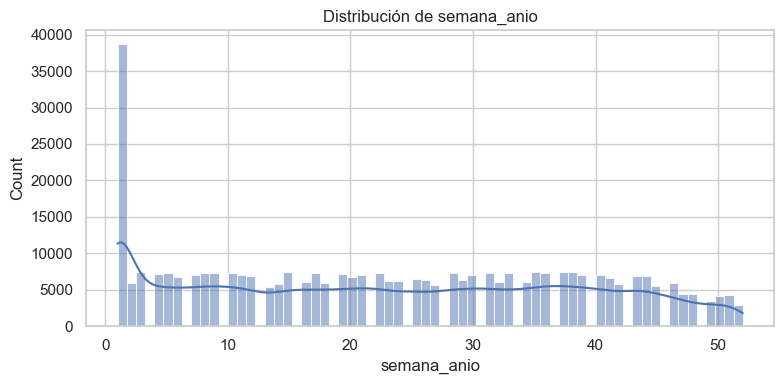

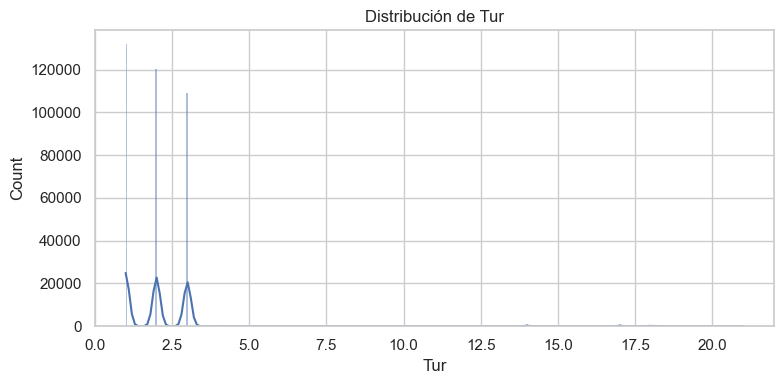

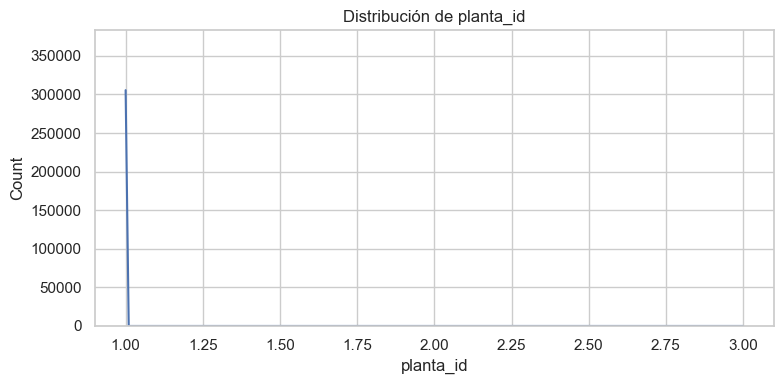

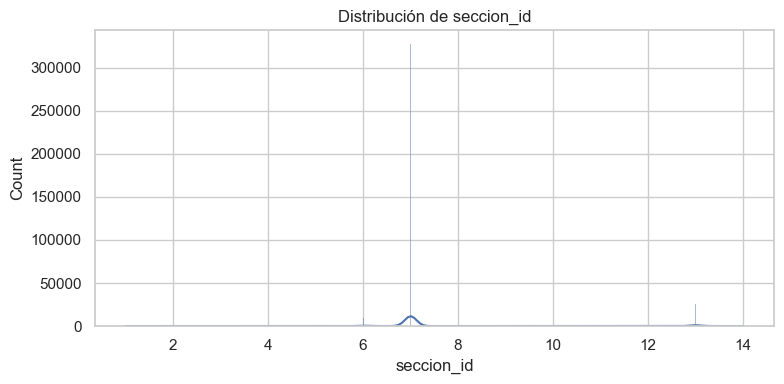

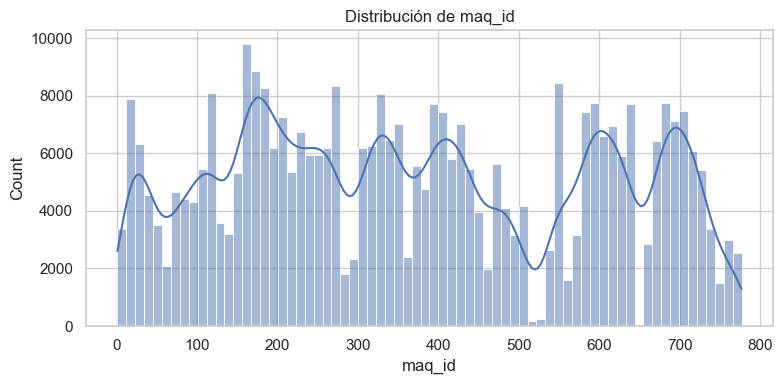

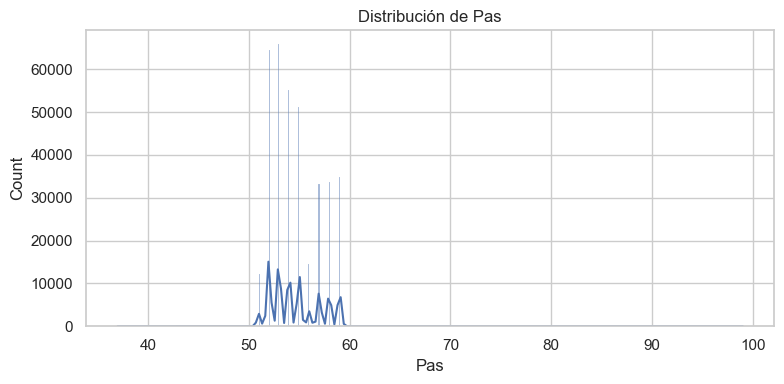

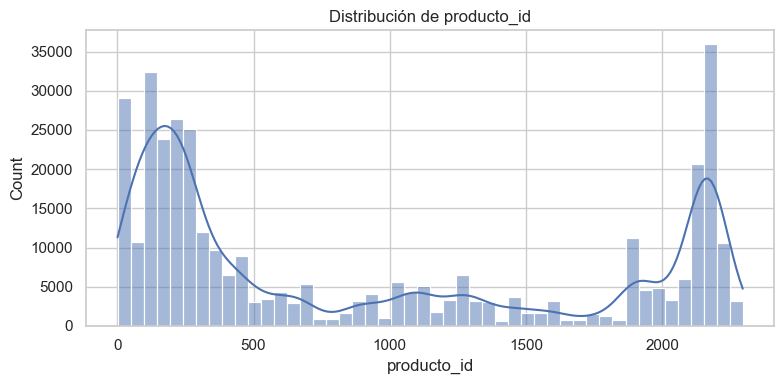

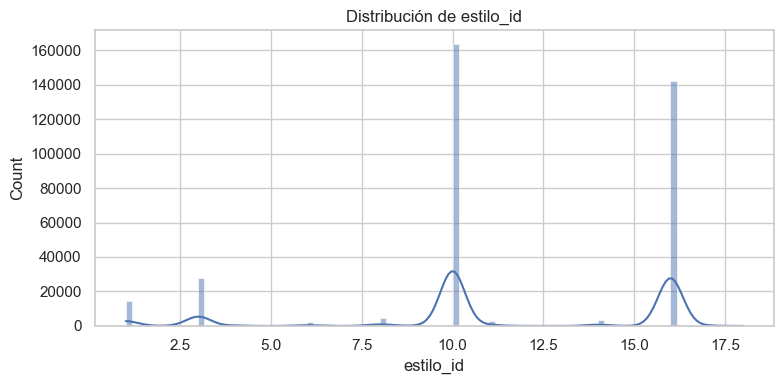

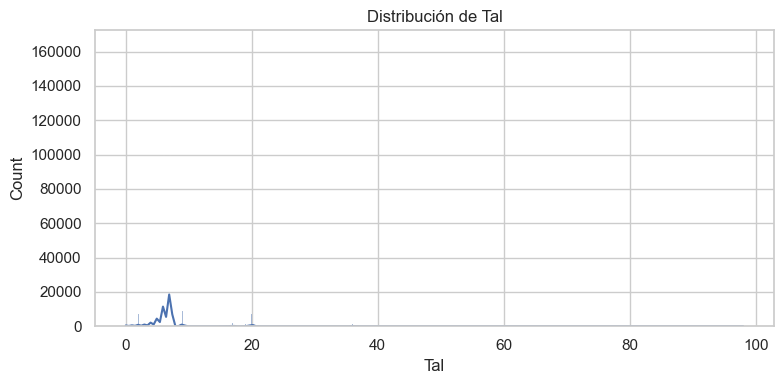

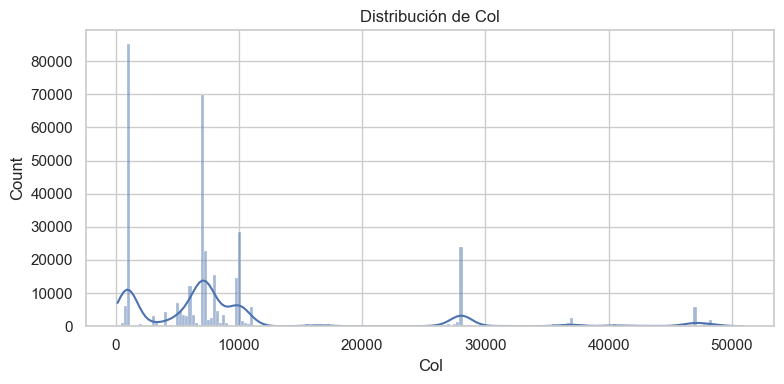

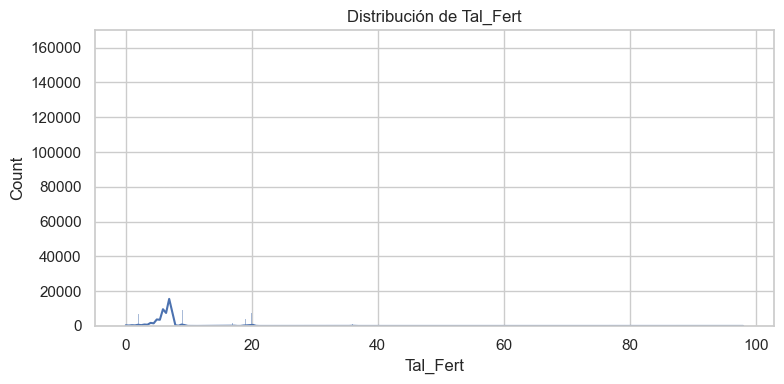

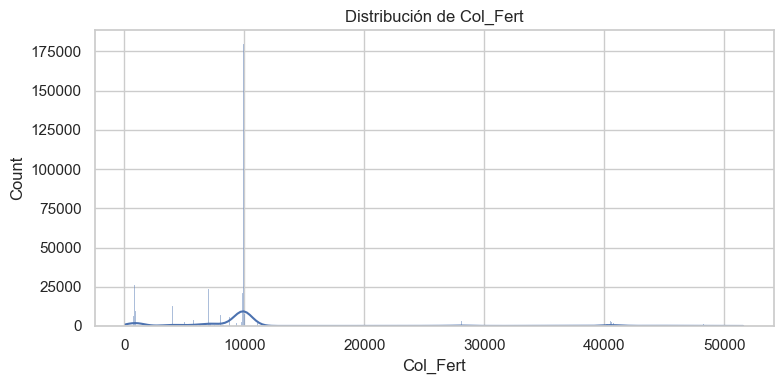

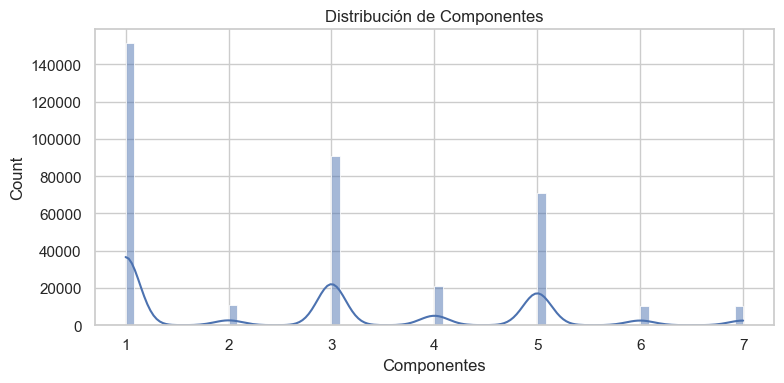

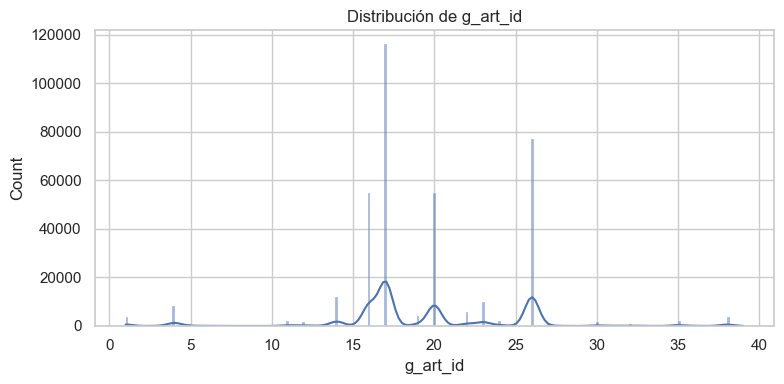

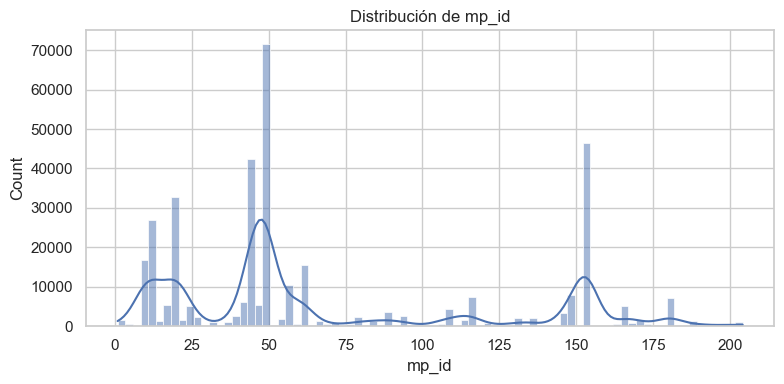

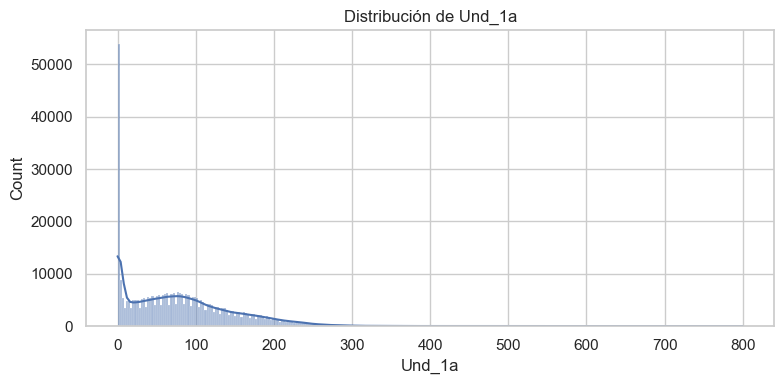

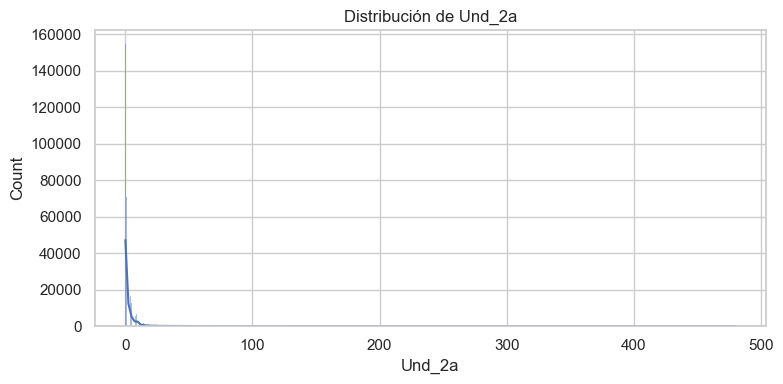

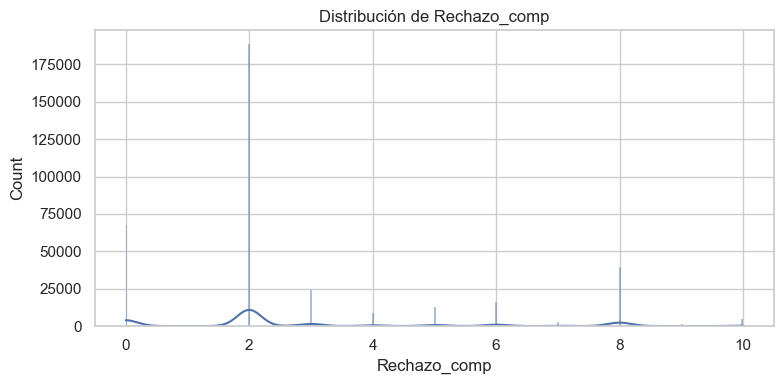

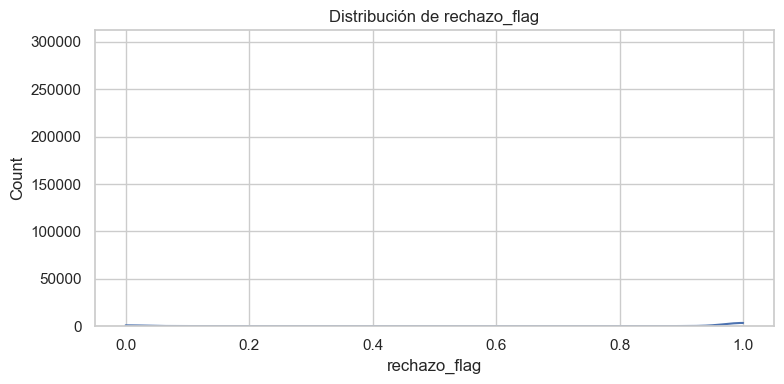

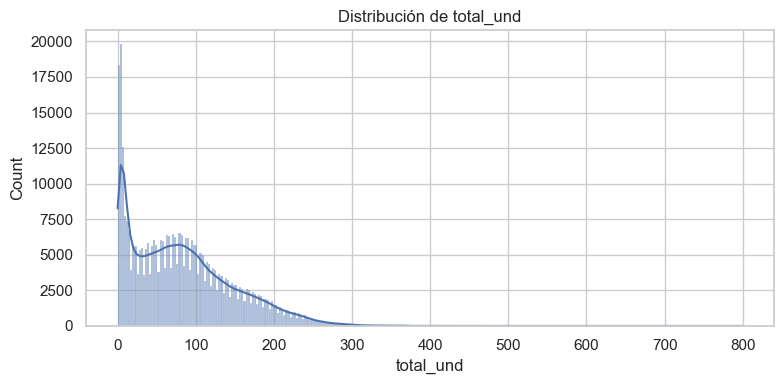

In [10]:
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
    plt.show()


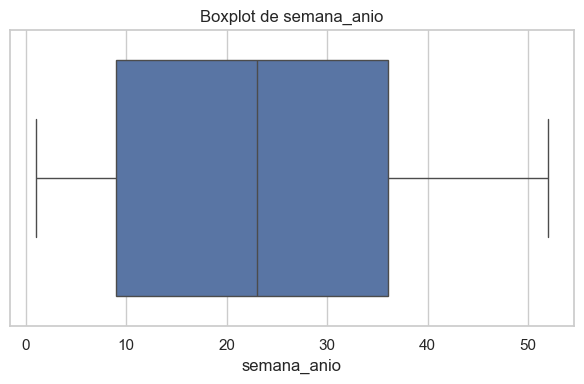

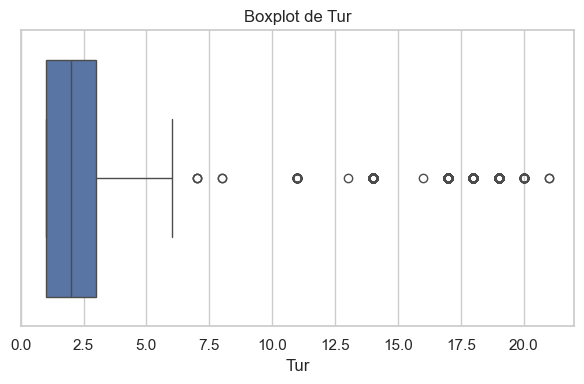

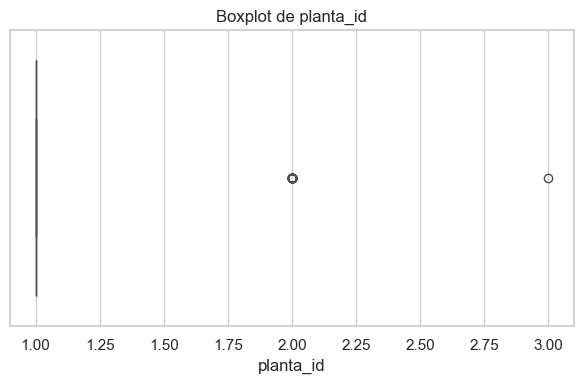

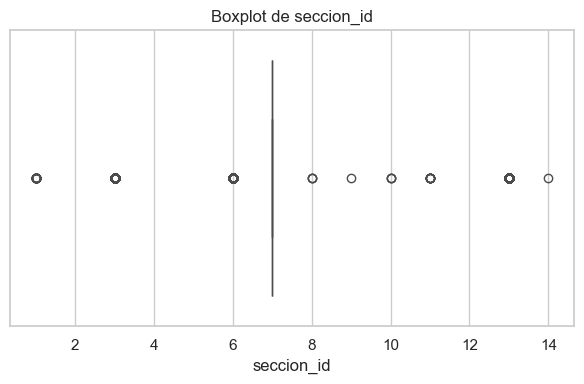

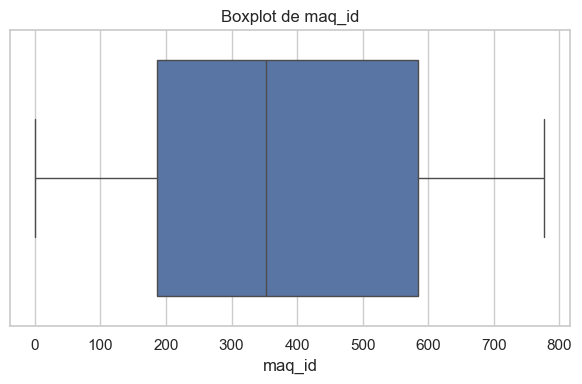

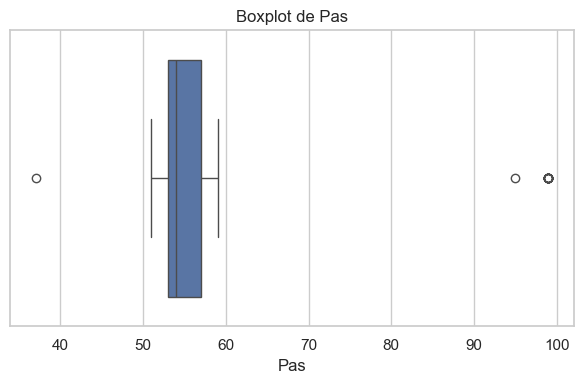

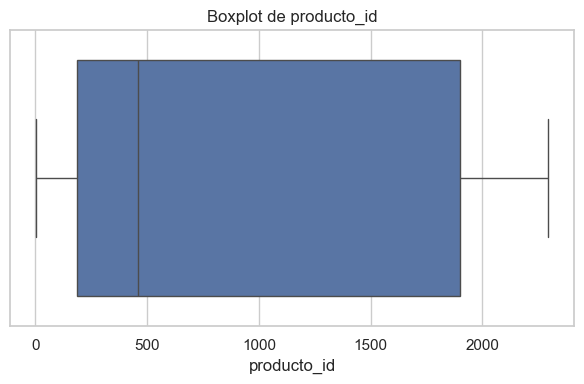

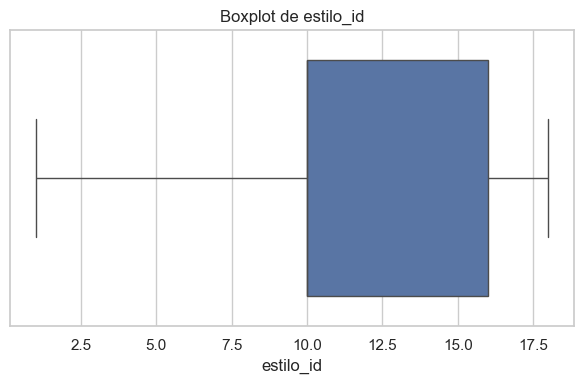

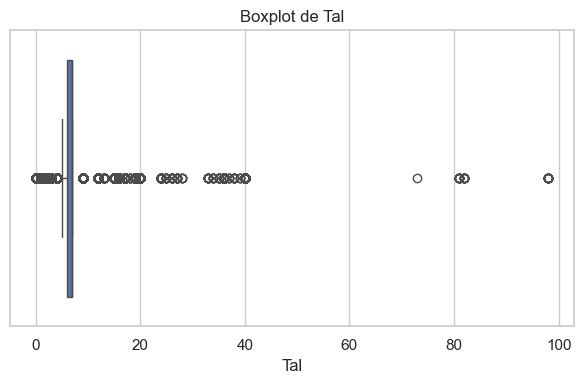

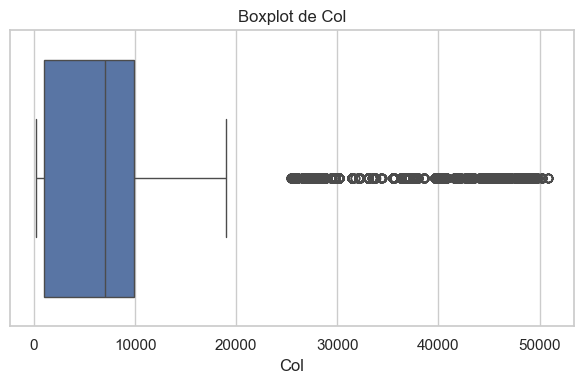

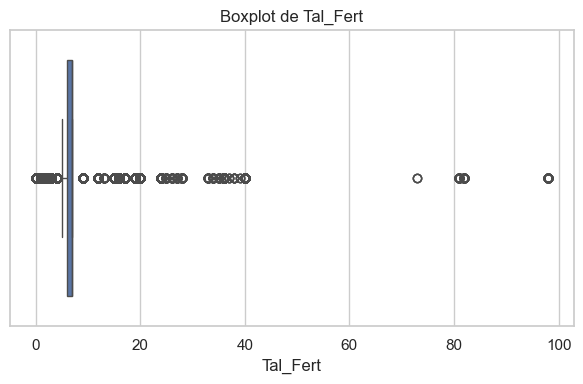

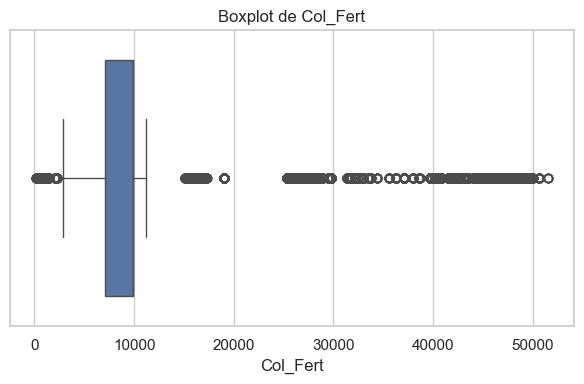

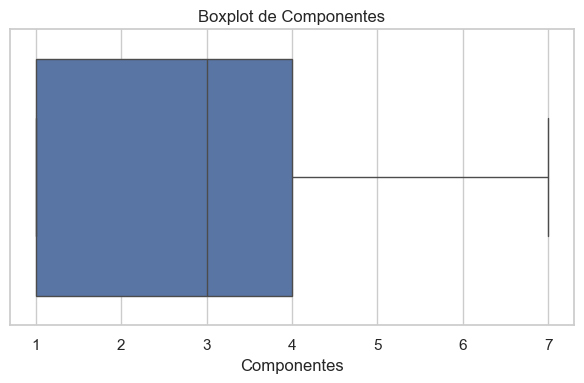

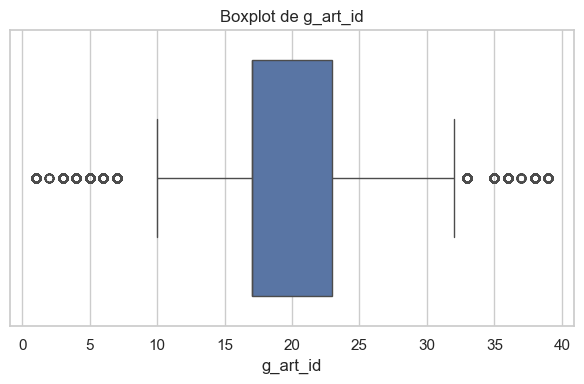

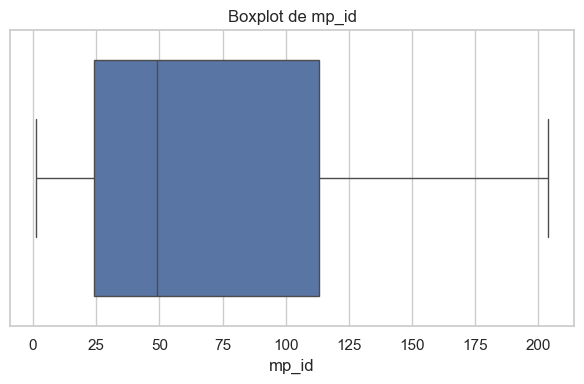

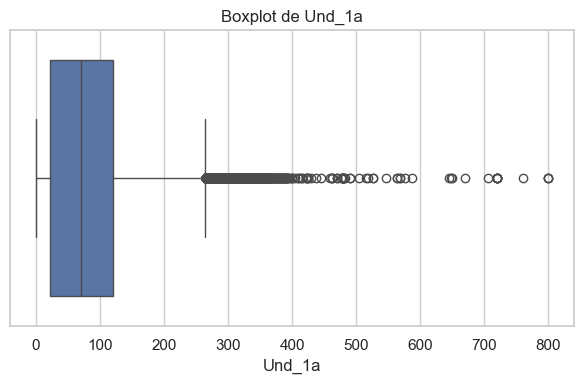

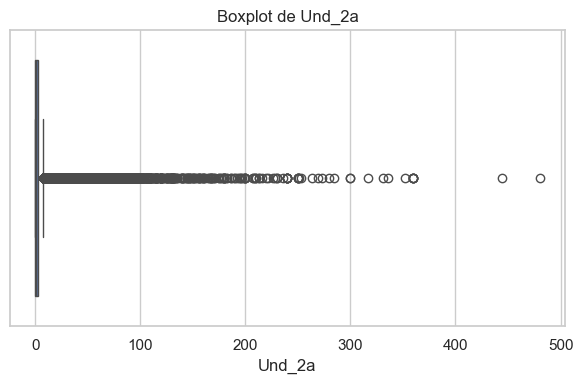

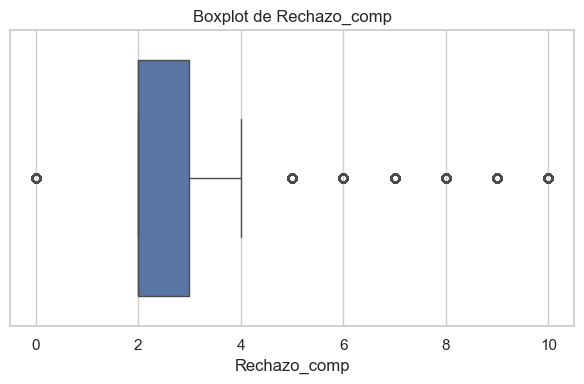

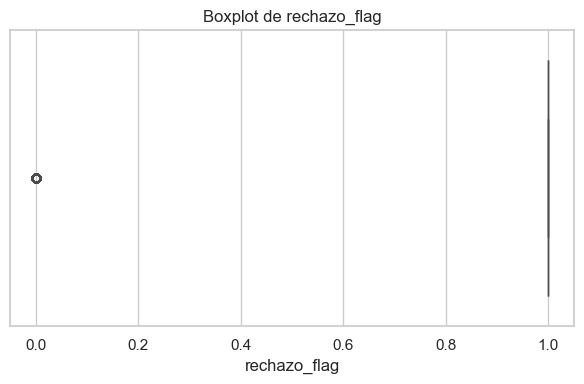

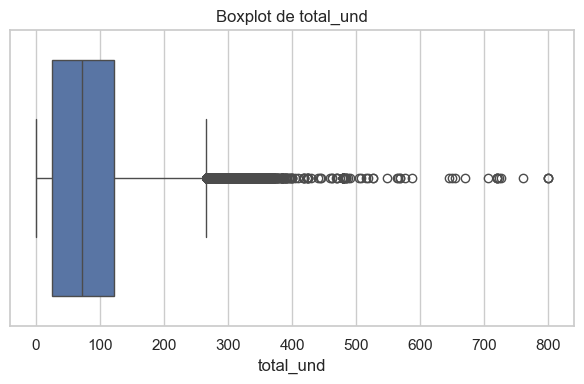

In [11]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()


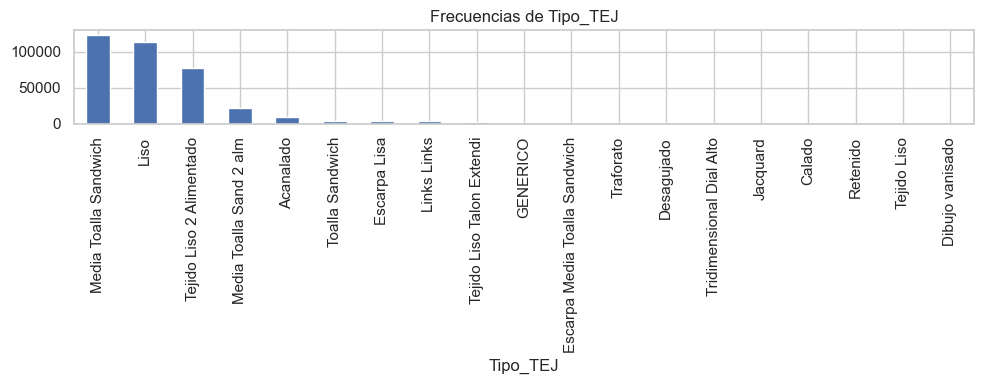

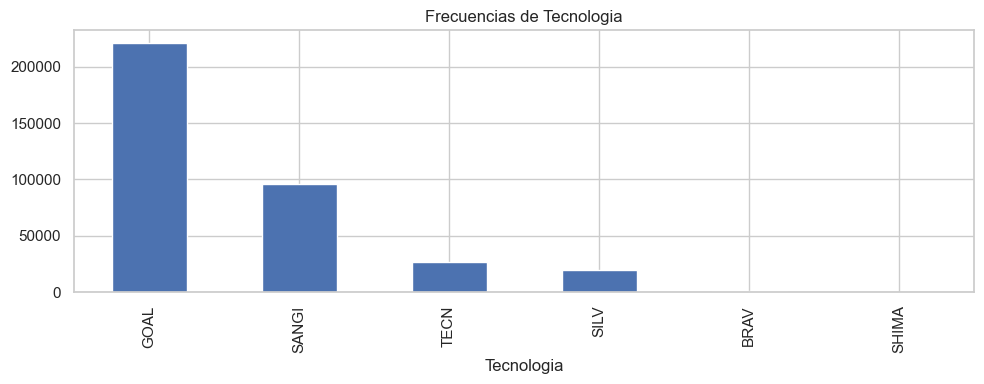

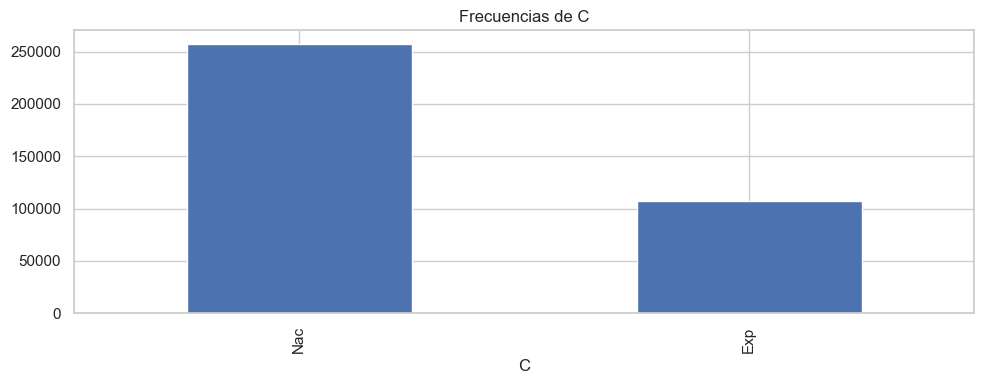

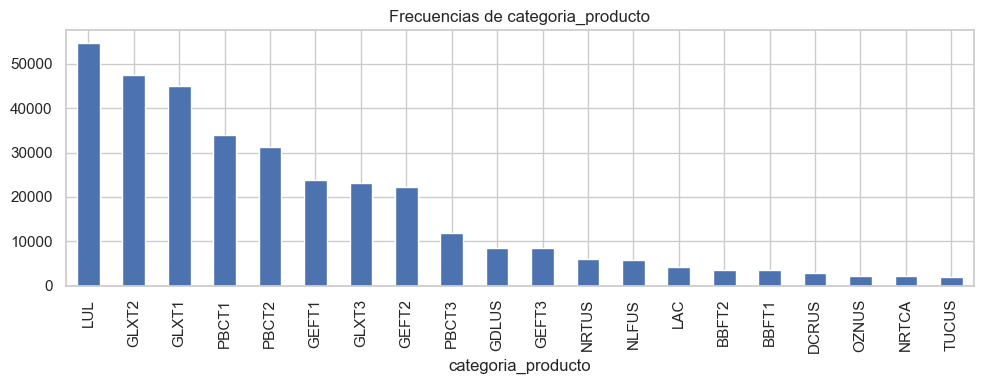

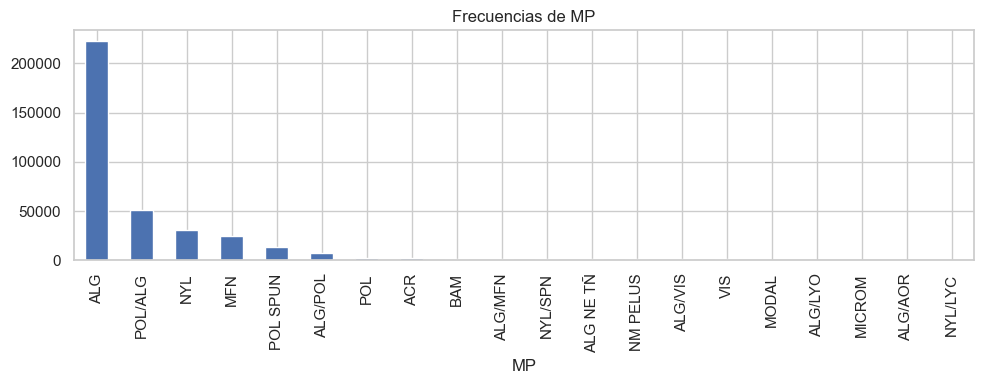

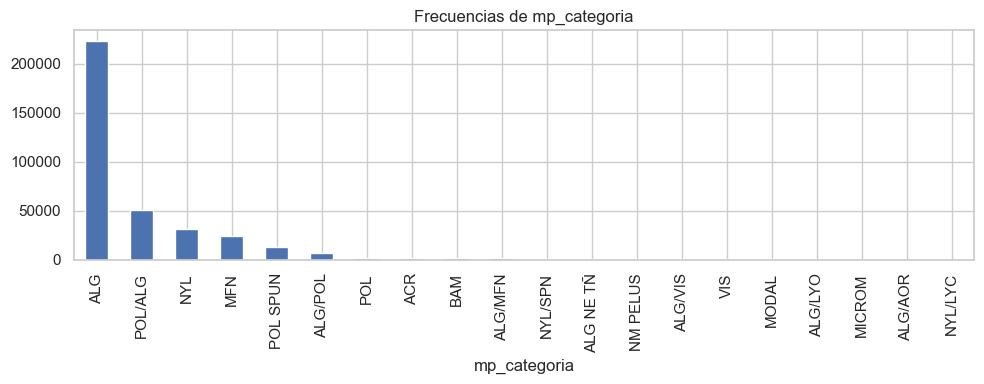

In [12]:
for col in cat_features:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Frecuencias de {col}")
    plt.tight_layout()
    plt.show()


## Correlaciones con la variable objetivo

In [13]:
corr = df[num_features + [TARGET_COL]].corr()[TARGET_COL].sort_values(ascending=False)
corr


Und_2a_percentage    1.0000
seccion_id           0.6001
Und_2a               0.4121
producto_id          0.1888
mp_id                0.1605
Tur                  0.1466
Pas                  0.1272
maq_id               0.0877
Col                  0.0867
Tal                  0.0548
Tal_Fert             0.0403
g_art_id             0.0366
Col_Fert             0.0306
planta_id            0.0011
semana_anio         -0.0012
estilo_id           -0.0189
Rechazo_comp        -0.0796
Componentes         -0.1190
rechazo_flag        -0.3956
total_und           -0.4659
Und_1a              -0.5052
Name: Und_2a_percentage, dtype: float64

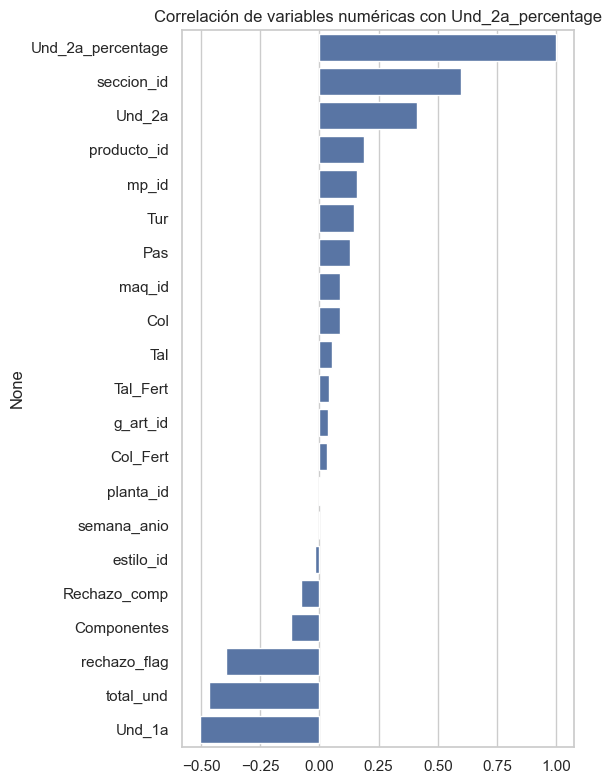

In [14]:
plt.figure(figsize=(6, 8))
sns.barplot(x=corr.values, y=corr.index)
plt.title(f"Correlación de variables numéricas con {TARGET_COL}")
plt.tight_layout()
plt.show()
